<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [4]:
# Here we will pull in the data as a DataFrame and check it using the .head method.
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [5]:
# Answer:
# The .shape attribute provides this info.
x = movies.shape
print('The dataset has',x[0],'rows and',x[1],'columns.')

The dataset has 979 rows and 6 columns.


#### Check the data type of each column.

In [6]:
# Answer:
# The .dtypes attribute provides this info.
print(movies.dtypes)

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object


#### Calculate the average movie duration.

In [7]:
# Answer:
# I prefer to start with the .describe method to get a better sense of the distribution.
print(movies.loc[:,'duration'].describe())
# Now I will print a sentence to tell you the mean.
x = round(movies.loc[:,'duration'].mean(),2)
print('The average movie duration is',x,'minutes.')

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64
The average movie duration is 120.98 minutes.


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [8]:
# Answer:
# I created a new DataFrame which is the same as the original, just sorted by duration.
movies_sorted = movies.sort_values('duration')
# I used the .head and .tail methods to get the index numbers for the shortest and longest movies.
print(movies_sorted.head(1).index)
print(movies_sorted.tail(1).index)
# Finally, I call the rows for those index numbers.
movies.loc[[389,476], :]
# I can see that these durations match the min and max from the .describe above.

Int64Index([389], dtype='int64')
Int64Index([476], dtype='int64')


,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

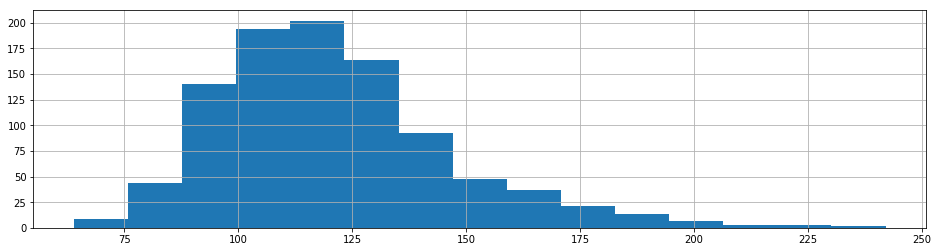

In [9]:
# Answer:
movies.loc[:,'duration'].hist(figsize=(16,4), bins=15);
# I chose 15 bins because it was the highest number that retained a smooth, normal-esque shape
# given the number of rows in the dataset.

#### Use a box plot to display that same data.

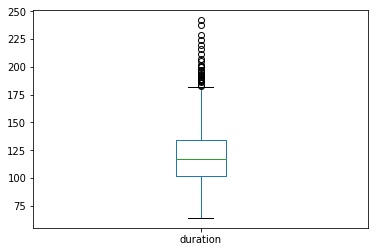

In [10]:
# Answer:
movies.loc[:,'duration'].plot(kind='box');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [11]:
# Answer:
# I use the .value_counts method for this.
# I included the 'dropna=False' to check if there are rows with null values. Looks like there are three.
movies.loc[:,'content_rating'].value_counts(dropna=False)

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
NaN            3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

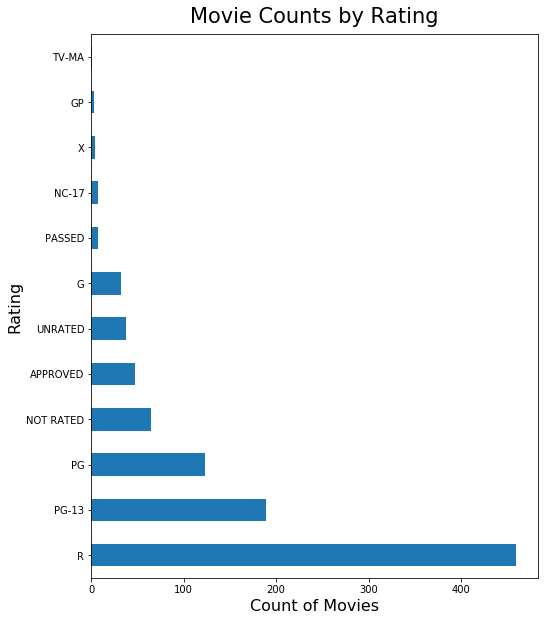

In [12]:
# Answer:
# Given the number of distinct values, decided to go for a horizontal bar plot.
ax = movies.loc[:,'content_rating'].value_counts().plot(kind='barh',figsize=(8,10));
ax.set_title('Movie Counts by Rating', fontsize=21, y=1.01);
ax.set_ylabel('Rating', fontsize=16);
ax.set_xlabel('Count of Movies', fontsize=16);

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [13]:
# Answer:
movies.loc[:, 'content_rating'].replace('NOT RATED', 'UNRATED', inplace=True)
movies.loc[:, 'content_rating'].replace('APPROVED', 'UNRATED', inplace=True)
movies.loc[:, 'content_rating'].replace('PASSED', 'UNRATED', inplace=True)
movies.loc[:, 'content_rating'].replace('GP', 'UNRATED', inplace=True)
movies.loc[:, 'content_rating'].value_counts(dropna=False)

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
NaN          3
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [14]:
# Answer:
movies.loc[:, 'content_rating'].replace('X', 'NC-17', inplace=True)
movies.loc[:, 'content_rating'].replace('TV-MA', 'NC-17', inplace=True)
movies.loc[:, 'content_rating'].value_counts(dropna=False)

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
NaN          3
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [15]:
# Answer:
movies.isnull().sum()
# Looks like the rating column is the only one with null values.

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [16]:
# Answer:
# First we will call up the three rows with null values.
movies.loc[movies.loc[:, 'content_rating'].isnull(), :]
# Given that these movies do not have a rating, I will fill them in with 'UNRATED'.
movies.loc[movies.loc[:, 'content_rating'].isnull(), 'content_rating'] = 'UNRATED'
movies.loc[:, 'content_rating'].value_counts(dropna=False)
# I use the value counts to confirm that UNRATED has increased by 3 and that there are no more null values.
movies.isnull().sum()
# Finally, we can confirm that no columns have any null values.

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [17]:
# Answer:
movies.loc[:,'two_hours'] = movies.loc[:,'duration'] >= 120
# First we add a column that is True if the movie is 2 hours or longer and False if not.
print(movies.groupby('two_hours')['star_rating'].mean())
# Next we calculate the mean, grouped by the new column.
# We can see that the average star ratings are similar, but the longer movies are slightly higher-rated.
movies.drop('two_hours', axis=1, inplace=True)
# Finally, we drop this additional column that we created for this purpose.

two_hours
False    7.838667
True     7.948899
Name: star_rating, dtype: float64


#### Use a visualization to detect whether there is a relationship between duration and star rating.

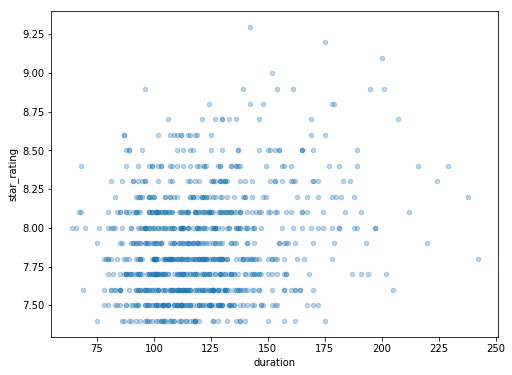

In [18]:
# Answer:
movies.plot(kind='scatter', x='duration', y='star_rating', alpha=0.3, figsize=(8, 6));
# Used a scatterplot to show the relationship. Set the alpha to 0.3 to get a sense of the relative frequency of data points.
# There does not appear to be a very strong correlation, perhaps a slight positive one.

#### Calculate the average duration for each genre.

In [19]:
# Answer:
print(movies.groupby('genre')['duration'].mean().sort_values())
# As above, we use groupby to achieve this.

genre
History       66.000000
Animation     96.596774
Film-Noir     97.333333
Horror       102.517241
Family       107.500000
Comedy       107.602564
Sci-Fi       109.000000
Fantasy      112.000000
Thriller     114.200000
Mystery      115.625000
Crime        122.298387
Action       126.485294
Drama        126.539568
Biography    131.844156
Adventure    134.840000
Western      136.666667
Name: duration, dtype: float64


## Advanced level

#### Visualize the relationship between content rating and duration.

C:\Users\jiconway\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


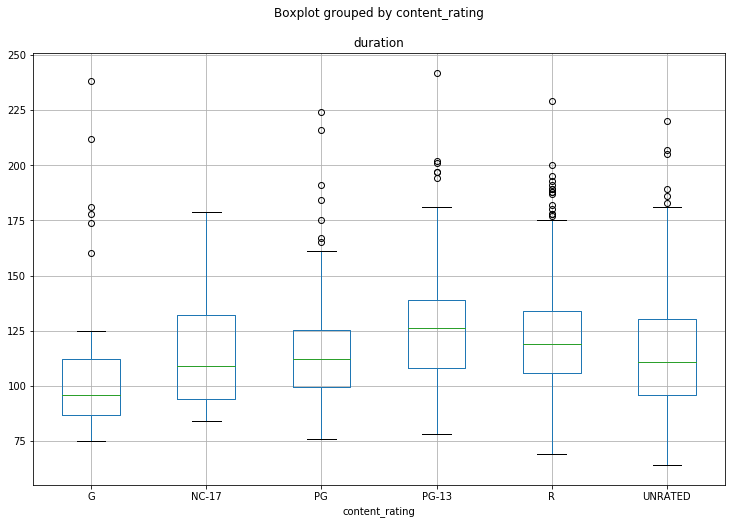

In [20]:
# Answer:
movies.boxplot(column='duration', by='content_rating', figsize=(12,8));
# A scatterplot isn't available for this because content_rating is not a numeric field.
# I felt a series of boxplots would show how the distribution of duration varies amongst the content ratings.

#### Determine the top rated movie (by star rating) for each genre.

In [21]:
# Answer:
max_by_genre = pd.DataFrame(movies.groupby('genre')['star_rating'].max())
# First I create a DataFrame where the index is the genres and the values are the max for each genre.
max_by_genre.columns = ['max_star_rating']
# I retitle the column of the new DataFrame to be different than the original.
max_by_genre.loc[:,'genre'] = max_by_genre.index
# I want the genre to be a column, not just the index, to make the join with the whole dataset work properly.
movies_with_max = pd.merge(movies, max_by_genre)
# Now I've got the maximum star rating for the genre in each row.
highest_rated_movies = (movies_with_max.loc[:,'star_rating'] == movies_with_max.loc[:,'max_star_rating'])
# I set a filter to check if the star rating for a given movie is equal to the max for its genre.
movies_with_max.loc[highest_rated_movies, :].sort_values(by='genre')
# Finally, we call up all the rows that satisfied the filter.
# We can see that some genres had multiple movies that achieved the max rating.

,star_rating,title,content_rating,genre,duration,actors_list,max_star_rating
124,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",9.0
547,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...",8.9
855,8.6,Spirited Away,PG,Animation,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy...",8.6
622,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings...",8.9
701,8.6,Modern Times,G,Comedy,87,"[u'Charles Chaplin', u'Paulette Goddard', u'He...",8.6
700,8.6,City Lights,UNRATED,Comedy,87,"[u'Charles Chaplin', u'Virginia Cherrill', u'F...",8.6
699,8.6,Life Is Beautiful,PG-13,Comedy,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G...",8.6
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",9.3
261,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh...",8.9
260,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals...",8.9


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [22]:
# Answer:
movies.loc[movies.duplicated('title', keep=False), :].sort_values(by='title')
# First we call up all the rows that include a duplicate title.
# These are not duplicates but show separate rows for remakes of the same movie.

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [23]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [24]:
# Answer:
mean_by_genre = pd.DataFrame(movies.groupby('genre')['star_rating'].mean())
# First I create a DataFrame where the index is the genres and the values are the mean for each genre.
mean_by_genre.columns = ['mean_star_rating']
# I retitle the column of the new DataFrame to be different than the original.
mean_by_genre.loc[:,'genre'] = mean_by_genre.index
# I want the genre to be a column, not just the index, to make joins work properly.
count_by_genre = pd.DataFrame(movies.loc[:,'genre'].value_counts())
# Same as above, we will create a new DataFrame for counts, retitle the columns, and make genre a column.
count_by_genre.columns = ['movie_count']
count_by_genre.loc[:,'genre'] = count_by_genre.index
# Now we will merge the two tables together.
count_and_mean_by_genre = pd.merge(count_by_genre, mean_by_genre)
# Now we will filter to get rows where the count is at least 10.
count_and_mean_by_genre.loc[count_and_mean_by_genre.loc[:, 'movie_count'] >= 10, :].sort_values(by='mean_star_rating', ascending=False)

,movie_count,genre,mean_star_rating
8,16,Mystery,7.975000
5,75,Adventure,7.933333
3,124,Crime,7.916935
6,62,Animation,7.914516
0,278,Drama,7.902518
2,136,Action,7.884559
4,77,Biography,7.862338
1,156,Comedy,7.822436
7,29,Horror,7.806897


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [25]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [26]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!